In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [194]:
#Load data with wine information obtained from Kaggle: https://www.kaggle.com/datasets/dev7halo/wine-information?select=wine_info.csv

In [195]:
df = pd.read_csv('CleansingWine.csv', index_col = 0,low_memory=False)
display(df)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Cinsault,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,168703,"Besserat de Bellefon, Bleu Brut",Besserat de Bellefon,France,Champagne,NaN,NaN,NaN,Pinot Meunier,Chardonnay,...,"Appetizer, Table",NaN,NaN,SWEET1,ACIDITY5,BODY2,TANNIN1,128000,0,750
21601,168704,"Leopard’s Leap, Cuvee Brut",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,NaN,NaN,Chardonnay,Chenin Blanc,...,"Appetizer, Table",12~13,6~8,SWEET1,ACIDITY5,BODY2,TANNIN1,40000,0,750
21602,168705,"Leopard’s Leap, Chardonnay Pinot Noir",Leopards Leap,the Republic of South Africa,Western Cape,NaN,NaN,NaN,Chardonnay,Pinot Noir,...,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750
21603,168706,"Leopard’s Leap, Chardonnay",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,Wellington,NaN,Chardonnay,NaN,...,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750


In [196]:
#This data set is interesting because it includes tasting elements that can help correlate them to rating, but it does not include rating so it is impossible to make the connection. However, this can be used to find the most common favour profiles for each variety and region. 
#The data, so far, seems appropriate to build a prediction model for the type of wine

In [197]:
#Convertion price column from korean currency into euro

df['price'] = (df['price']*0.00075)
display(df)

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,165.00,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,82.50,2016,750
2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Cinsault,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0.00,0,750
3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0.00,0,750
4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0.00,2003,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,168703,"Besserat de Bellefon, Bleu Brut",Besserat de Bellefon,France,Champagne,NaN,NaN,NaN,Pinot Meunier,Chardonnay,...,"Appetizer, Table",NaN,NaN,SWEET1,ACIDITY5,BODY2,TANNIN1,96.00,0,750
21601,168704,"Leopard’s Leap, Cuvee Brut",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,NaN,NaN,Chardonnay,Chenin Blanc,...,"Appetizer, Table",12~13,6~8,SWEET1,ACIDITY5,BODY2,TANNIN1,30.00,0,750
21602,168705,"Leopard’s Leap, Chardonnay Pinot Noir",Leopards Leap,the Republic of South Africa,Western Cape,NaN,NaN,NaN,Chardonnay,Pinot Noir,...,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,30.00,2020,750
21603,168706,"Leopard’s Leap, Chardonnay",Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,Wellington,NaN,Chardonnay,NaN,...,"Appetizer, Table",12~13,10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,30.00,2020,750


In [198]:
df.dtypes


id               int64
name            object
producer        object
nation          object
local1          object
local2          object
local3          object
local4          object
varieties1      object
varieties2      object
varieties3      object
varieties4      object
varieties5      object
varieties6      object
varieties7      object
varieties8      object
varieties9      object
varieties10     object
varieties11     object
varieties12     object
type            object
use             object
abv             object
degree          object
sweet           object
acidity         object
body            object
tannin          object
price          float64
year             int64
ml               int64
dtype: object

In [199]:
df.isnull().sum()

id                 0
name               0
producer           0
nation             2
local1           900
local2         10460
local3         18014
local4         21603
varieties1       349
varieties2     14087
varieties3     17577
varieties4     20275
varieties5     21226
varieties6     21500
varieties7     21574
varieties8     21587
varieties9     21598
varieties10    21599
varieties11    21600
varieties12    21601
type              58
use               14
abv             7146
degree          7145
sweet              2
acidity           13
body              13
tannin            13
price              0
year               0
ml                 0
dtype: int64

In [200]:
#there is a lot of null values and some columns that, in first glance, seem redundant
#locel2,3 and 4 will be dropped because ther information about subregieons is not relevant for the project. 
#The same happens with the varieties, we can just keep variety1 because we don't nee dto know the subvarieties and they are mostly empty

df1 = df.drop(columns=['local2', 'local3', 'local4', 'varieties2', 'varieties3', 'varieties4', 'varieties5', 'varieties6', 'varieties7', 'varieties8', 'varieties9', 'varieties10', 'varieties11', 'varieties12'])

In [201]:
df1.isnull().sum()

id               0
name             0
producer         0
nation           2
local1         900
varieties1     349
type            58
use             14
abv           7146
degree        7145
sweet            2
acidity         13
body            13
tannin          13
price            0
year             0
ml               0
dtype: int64

In [202]:
# abv and degree reference the acoholic content of the wine. The average is calculated according to the alcohol content of each type of wine use, table, dessert... The aberage is not relevant for our exploration. However, I think degree might be relevant as it can be related to the different favour profiles. I will keep that one for now. 

In [203]:
df1 = df1.drop(columns=['abv'])

In [204]:
#now that df2 is created I will drop the rows that have missing values as it is very few
df2 = df1.dropna()

In [205]:
df2.isnull().sum()

id            0
name          0
producer      0
nation        0
local1        0
varieties1    0
type          0
use           0
degree        0
sweet         0
acidity       0
body          0
tannin        0
price         0
year          0
ml            0
dtype: int64

In [206]:
#before doing any further exploration I will analyse the type column to decide how to move forward
df2['type'].unique()

array(['Red', 'White', 'Rose', 'Fortified', 'Sparkling', 'Etc', 'Hard'],
      dtype=object)

In [207]:
print(df2['type'].value_counts())

Red          8884
White        3350
Sparkling     919
Rose          215
Fortified     124
Hard           35
Etc            23
Name: type, dtype: int64


In [208]:
#I will drop fortified, hard, etc and korean as they are not found any in many of the other wine data sets I might use for next steps and they account for a very small part of the whole count. 
values = ['Fortified', 'Hard', 'Etc', 'Korean']

df2 = df2[df2.type.isin(values) == False]


In [209]:
print(df2['type'].value_counts())

Red          8884
White        3350
Sparkling     919
Rose          215
Name: type, dtype: int64


In [210]:
#convert degree to the avegare degree of each type of wine as to have a singel value for each cell

In [211]:
def degree_mean(x):
    if '~' in x:
        return sum([float(value) for value in x.split('~')])/2
    else:
        return float(x)

In [212]:
df2['degree'] = df2.degree.apply(degree_mean)

In [213]:
df2.head()

,id,name,producer,nation,local1,varieties1,type,use,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,Cabernet Sauvignon,Red,Table,18.0,SWEET1,ACIDITY4,BODY5,TANNIN4,165.0,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,Cabernet Sauvignon,Red,Table,17.0,SWEET1,ACIDITY3,BODY4,TANNIN4,82.5,2016,750
4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,Cabernet Sauvignon,Red,Table,18.0,SWEET1,ACIDITY3,BODY3,TANNIN4,0.0,2003,750
5,137202,"Calvet, Beaujolais Villages",Calvet,France,Bourgogne,Gamay,Red,Table,14.0,SWEET2,ACIDITY4,BODY2,TANNIN2,0.0,2007,750
6,137203,"Calvet, Aetos",Calvet,France,Bordeaux,Merlot,Red,Table,18.0,SWEET1,ACIDITY3,BODY4,TANNIN3,0.0,2003,750


In [214]:
#Here I perform several aggregation to get a clearer picture of teh data and how columns relate to each other

In [215]:
df2.groupby('nation').agg({'type': 'count'})

,type
nation,
Argentina,419
Australia,1106
Austria,85
Bulgaria,5
Canada,24
Chile,1524
China,3
Croatia,6
France,3565


In [216]:
#some countries have only a few wines, so I will be removing the countries that have less than 200 
values = ['Uruguay', 'Georgia', 'UK', 'Slovenia', 'Romania', 'Portugal', 'Moldova', 'Lebanon', 'Korea', 'Japan', 'Israel', 'Hungary', 'Greece', 'Croatia', 'China', 'Canada', 'Bulgaria', 'Austria']

df2 = df2[df2.nation.isin(values) == False]

In [217]:
#group types by countrye and number of each
country_type=df2.groupby('nation').agg({'type': 'value_counts'})

In [218]:
display(country_type)

type
nation                       type           
Argentina                    Red         332
                             White        76
                             Sparkling     8
                             Rose          3
Australia                    Red         767
                             White       280
                             Sparkling    46
                             Rose         13
Chile                        Red        1138
                             White       360
                             Rose         13
                             Sparkling    13
France                       Red        2291
                             White       831
                             Sparkling   378
                             Rose         65
Germany                      White       197
                             Red          14
                             Sparkling    11
                             Rose          6
Italy                        Red        1995
                             White       640
                             Sparkling   285
                             Rose         34
New Zealand                  White       128
                             Red          74
                             Sparkling     6
                             Rose          2
Spain                        Red         684
                             White       145
                             Sparkling   113
                             Rose         24
USA                          Red        1297
                             White       481
                             Rose         40
                             Sparkling    35
the Republic of South Africa Red         135
                             White        53
                             Sparkling     7
                             Rose          5

In [219]:
#This will be better represented in a Tableau plot. 
#Now we will look at the price average per country

country_price=df2.groupby('nation').agg({'price': 'mean'})

In [220]:
display(country_price)

,price
nation,
Argentina,29.522076
Australia,39.439286
Chile,25.070059
France,85.839926
Germany,40.000329
Italy,52.197908
New Zealand,41.478929
Spain,41.860280
USA,86.106905


In [221]:
#The average of thge countries is quite similar with teh exceptiion of USA and France. 

In [222]:
type_profiles=df2.groupby('type').agg({'sweet': 'value_counts'})

In [223]:
type_profiles

sweet
type      sweet        
Red       SWEET1   8320
          SWEET2    277
          SWEET4     77
          SWEET3     36
          SWEET5     17
Rose      SWEET1    110
          SWEET2     51
          SWEET4     22
          SWEET3     21
          SWEET5      1
Sparkling SWEET1    633
          SWEET4    121
          SWEET2    102
          SWEET3     44
          SWEET5      2
White     SWEET1   2521
          SWEET4    235
          SWEET2    193
          SWEET5    147
          SWEET3     95

In [224]:
type_acidity=df2.groupby('type').agg({'acidity': 'value_counts'})
type_acidity

acidity
type      acidity          
Red       ACIDITY3     5210
          ACIDITY4     2846
          ACIDITY2      334
          ACIDITY5      269
          ACIDITY1       68
Rose      ACIDITY3      126
          ACIDITY2       41
          ACIDITY4       27
          ACIDITY1        9
          ACIDITY5        2
Sparkling ACIDITY3      268
          ACIDITY4      261
          ACIDITY5      196
          ACIDITY2      136
          ACIDITY1       41
White     ACIDITY3     1457
          ACIDITY4     1008
          ACIDITY5      351
          ACIDITY2      331
          ACIDITY1       44

In [225]:
type_body=df2.groupby('type').agg({'body': 'value_counts'})
type_body

body
type      body       
Red       BODY4  3558
          BODY3  3427
          BODY5  1285
          BODY2   454
          BODY1     3
Rose      BODY2   113
          BODY3    83
          BODY4     7
          BODY1     2
Sparkling BODY3   403
          BODY2   359
          BODY4   117
          BODY1    16
          BODY5     7
White     BODY3  1418
          BODY2  1150
          BODY4   479
          BODY1    72
          BODY5    72

In [226]:
type_tannin=df2.groupby('type').agg({'tannin': 'value_counts'})
type_tannin

tannin
type      tannin         
Red       TANNIN3    4164
          TANNIN4    3071
          TANNIN2     914
          TANNIN5     542
          TANNIN1      36
Rose      TANNIN1     178
          TANNIN2      23
          TANNIN3       3
          TANNIN4       1
Sparkling TANNIN1     883
          TANNIN2      16
          TANNIN3       3
White     TANNIN1    3180
          TANNIN2       6
          TANNIN3       5

In [227]:
type_price=df2.groupby('type').agg({'price': 'mean'})
type_price

,price
type,
Red,65.689203
Rose,18.618622
Sparkling,73.198137
White,42.221634


In [228]:
country_acidity=df2.groupby('nation').agg({'acidity': 'value_counts'})
country_acidity

acidity
nation                       acidity          
Argentina                    ACIDITY3      330
                             ACIDITY4       58
                             ACIDITY2       20
                             ACIDITY1        7
                             ACIDITY5        4
Australia                    ACIDITY3      713
                             ACIDITY4      307
                             ACIDITY2       61
                             ACIDITY1       14
                             ACIDITY5       11
Chile                        ACIDITY3     1089
                             ACIDITY4      354
                             ACIDITY2       53
                             ACIDITY1       18
                             ACIDITY5       10
France                       ACIDITY3     1607
                             ACIDITY4     1406
                             ACIDITY5      482
                             ACIDITY2       66
                             ACIDITY1        4
Germany                      ACIDITY5       87
                             ACIDITY4       50
                             ACIDITY2       48
                             ACIDITY3       41
                             ACIDITY1        2
Italy                        ACIDITY3     1421
                             ACIDITY4     1083
                             ACIDITY2      322
                             ACIDITY1       86
                             ACIDITY5       42
New Zealand                  ACIDITY5       86
                             ACIDITY4       68
                             ACIDITY3       51
                             ACIDITY2        4
                             ACIDITY1        1
Spain                        ACIDITY3      684
                             ACIDITY4      158
                             ACIDITY2      109
                             ACIDITY5       11
                             ACIDITY1        4
USA                          ACIDITY3     1086
                             ACIDITY4      521
                             ACIDITY2      144
                             ACIDITY5       77
                             ACIDITY1       25
the Republic of South Africa ACIDITY4      137
                             ACIDITY3       39
                             ACIDITY2       15
                             ACIDITY5        8
                             ACIDITY1        1

In [229]:
country_tannin=df2.groupby('nation').agg({'tannin': 'value_counts'})
country_tannin

tannin
nation                       tannin         
Argentina                    TANNIN4     175
                             TANNIN3     119
                             TANNIN1      87
                             TANNIN5      27
                             TANNIN2      11
Australia                    TANNIN4     427
                             TANNIN1     330
                             TANNIN3     226
                             TANNIN5      89
                             TANNIN2      34
Chile                        TANNIN3     662
                             TANNIN1     386
                             TANNIN4     360
                             TANNIN2      74
                             TANNIN5      42
France                       TANNIN1    1271
                             TANNIN3    1222
                             TANNIN4     538
                             TANNIN2     463
                             TANNIN5      71
Germany                      TANNIN1     211
                             TANNIN2       7
                             TANNIN4       6
                             TANNIN3       4
Italy                        TANNIN1     957
                             TANNIN3     861
                             TANNIN4     741
                             TANNIN2     235
                             TANNIN5     160
New Zealand                  TANNIN1     137
                             TANNIN3      50
                             TANNIN2      13
                             TANNIN4      10
Spain                        TANNIN3     421
                             TANNIN1     280
                             TANNIN4     198
                             TANNIN2      46
                             TANNIN5      21
USA                          TANNIN3     570
                             TANNIN1     555
                             TANNIN4     528
                             TANNIN5     130
                             TANNIN2      70
the Republic of South Africa TANNIN4      89
                             TANNIN1      63
                             TANNIN3      40
                             TANNIN2       6
                             TANNIN5       2

In [230]:
country_body=df2.groupby('nation').agg({'body': 'value_counts'})
country_body

body
nation                       body       
Argentina                    BODY4   185
                             BODY3   131
                             BODY5    59
                             BODY2    44
Australia                    BODY4   404
                             BODY3   387
                             BODY5   190
                             BODY2   124
                             BODY1     1
Chile                        BODY3   718
                             BODY4   451
                             BODY2   228
                             BODY5   123
                             BODY1     4
France                       BODY3  1603
                             BODY4  1151
                             BODY2   572
                             BODY5   223
                             BODY1    16
Germany                      BODY3   107
                             BODY2    95
                             BODY4    20
                             BODY1     3
                             BODY5     3
Italy                        BODY3  1188
                             BODY4   836
                             BODY2   561
                             BODY5   320
                             BODY1    49
New Zealand                  BODY3   120
                             BODY2    65
                             BODY4    21
                             BODY1     4
Spain                        BODY4   373
                             BODY3   362
                             BODY2   147
                             BODY5    74
                             BODY1    10
USA                          BODY4   668
                             BODY3   604
                             BODY5   365
                             BODY2   210
                             BODY1     6
the Republic of South Africa BODY3   111
                             BODY4    52
                             BODY2    30
                             BODY5     7

In [231]:
country_sweet=df2.groupby('nation').agg({'sweet': 'value_counts'})
country_sweet

sweet
nation                       sweet        
Argentina                    SWEET1    395
                             SWEET2      9
                             SWEET5      7
                             SWEET3      4
                             SWEET4      4
Australia                    SWEET1    987
                             SWEET2     64
                             SWEET4     31
                             SWEET5     15
                             SWEET3      9
Chile                        SWEET1   1435
                             SWEET2     62
                             SWEET5     15
                             SWEET4     10
                             SWEET3      2
France                       SWEET1   3365
                             SWEET2    103
                             SWEET5     48
                             SWEET3     28
                             SWEET4     21
Germany                      SWEET1     63
                             SWEET3     59
                             SWEET2     36
                             SWEET4     36
                             SWEET5     34
Italy                        SWEET1   2470
                             SWEET4    288
                             SWEET2    140
                             SWEET3     28
                             SWEET5     28
New Zealand                  SWEET1    202
                             SWEET2      5
                             SWEET5      3
Spain                        SWEET1    829
                             SWEET2     72
                             SWEET3     35
                             SWEET4     25
                             SWEET5      5
USA                          SWEET1   1661
                             SWEET2    121
                             SWEET4     31
                             SWEET3     29
                             SWEET5     11
the Republic of South Africa SWEET1    177
                             SWEET2     11
                             SWEET4      9
                             SWEET3      2
                             SWEET5      1

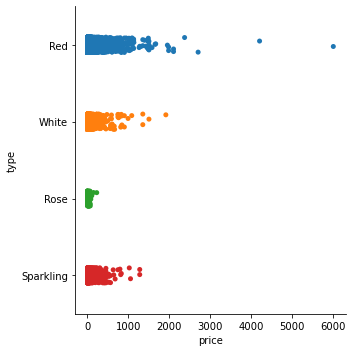

In [232]:
import seaborn as sns


sns.catplot(x="price", y="type", data=df2)

In [233]:
!pip install -U scipy

In [234]:
#To prove the observed relationships in the aggregation tables I will conduct a chi2 test to see if the flavour profiles are related to the type of wine

In [235]:
from scipy import stats

In [236]:
contingency_table=pd.crosstab(df2["sweet"],df2["type"])
print('contingency_table :-\n',contingency_table)


contingency_table :-
 type     Red  Rose  Sparkling  White
sweet                               
SWEET1  8320   110        633   2521
SWEET2   277    51        102    193
SWEET3    36    21         44     95
SWEET4    77    22        121    235
SWEET5    17     1          2    147


In [237]:
#Observed Values
Observed_Values = contingency_table.values 
#print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
#print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Accept H0,There is a relationship between 2 categorical variables")
else:
    print("Reject H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Accept H0,There is a relationship between 2 categorical variables")
else:
    print("Reject H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 744.9554264845231
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 744.9554264845231
critical_value: 3.841458820694124
p-value: 0.0
Accept H0,There is a relationship between 2 categorical variables
Accept H0,There is a relationship between 2 categorical variables


In [238]:
#sweetness and type have a relationshp
#I will make this into a function so that I can compare different flavour profile values with wine types

In [239]:
from scipy.stats import chi2

def chi_2_test(df1, df2): 
    contingency_table=pd.crosstab(df1,df2)
    Observed_Values = contingency_table.values 
    b=stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    alpha = 0.05
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    if chi_square_statistic>=critical_value:
        return print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        return print("Accept H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        return print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        return print("Accept H0,There is no relationship between 2 categorical variables")

In [240]:
chi_2_test(df2['type'], df2['sweet'])

Reject H0,There is a relationship between 2 categorical variables


In [241]:
chi_2_test(df2['type'], df2['tannin'])

Reject H0,There is a relationship between 2 categorical variables


In [242]:
chi_2_test(df2['type'], df2['body'])

Reject H0,There is a relationship between 2 categorical variables


In [243]:
chi_2_test(df2['type'], df2['acidity'])

Reject H0,There is a relationship between 2 categorical variables


In [244]:
chi_2_test(df2['nation'], df2['sweet'])

Reject H0,There is a relationship between 2 categorical variables


In [245]:
chi_2_test(df2['nation'], df2['body'])

Reject H0,There is a relationship between 2 categorical variables


In [246]:
chi_2_test(df2['nation'], df2['acidity'])

Reject H0,There is a relationship between 2 categorical variables


In [247]:
chi_2_test(df2['sweet'], df2['tannin'])

Reject H0,There is a relationship between 2 categorical variables


In [248]:
#To continue on I will convert the values in each flavour column for easier use

In [249]:
df2["sweet"] = df2["sweet"].map({"SWEET1" : 1, "SWEET2" : 2, "SWEET3" : 3, "SWEET4" : 4, "SWEET5" : 5})

In [250]:
df2["acidity"] = df2["acidity"].map({"ACIDITY1" : 1, "ACIDITY2" : 2, "ACIDITY3" : 3, "ACIDITY4" : 4, "ACIDITY5" : 5})

In [251]:
df2["body"] = df2["body"].map({"BODY1" : 1, "BODY2" : 2, "BODY3" : 3, "BODY4" : 4, "BODY5" : 5})

In [252]:
df2["tannin"] = df2["tannin"].map({"TANNIN1" : 1, "TANNIN2" : 2, "TANNIN3" : 3, "TANNIN4" : 4, "TANNIN5" : 5})

In [253]:
df2.head()

,id,name,producer,nation,local1,varieties1,type,use,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,Altair,Chile,Rapel Valley,Cabernet Sauvignon,Red,Table,18.0,1,4,5,4,165.0,2014,750
1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,Cabernet Sauvignon,Red,Table,17.0,1,3,4,4,82.5,2016,750
4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,Cabernet Sauvignon,Red,Table,18.0,1,3,3,4,0.0,2003,750
5,137202,"Calvet, Beaujolais Villages",Calvet,France,Bourgogne,Gamay,Red,Table,14.0,2,4,2,2,0.0,2007,750
6,137203,"Calvet, Aetos",Calvet,France,Bordeaux,Merlot,Red,Table,18.0,1,3,4,3,0.0,2003,750


In [254]:
df2['use'].value_counts()

Table                        11040
Appetizer, Table               997
Dessert                        350
Appetizer                      326
Appetizer, Dessert             190
Table, Dessert                 110
Appetizer, Table, Dessert       10
Table, Etc                       2
Name: use, dtype: int64

In [255]:
#drop more columns not needed for the prediction model 
df2 = df2.drop(columns=['id', 'name', 'producer', 'local1', 'varieties1', 'ml'])

In [256]:
df2.to_csv('clean_data.csv')

In [257]:
df2.head()

,nation,type,use,degree,sweet,acidity,body,tannin,price,year
0,Chile,Red,Table,18.0,1,4,5,4,165.0,2014
1,Chile,Red,Table,17.0,1,3,4,4,82.5,2016
4,USA,Red,Table,18.0,1,3,3,4,0.0,2003
5,France,Red,Table,14.0,2,4,2,2,0.0,2007
6,France,Red,Table,18.0,1,3,4,3,0.0,2003


In [258]:
#Prediction model
#split num/cat transform, merge and test
df3 = df2.copy()


In [259]:
X = df3.drop(['type'],axis=1)
y =df3['type']

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [261]:
y_train.isna().sum()
y_test.isna().sum()

0

In [262]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,degree,sweet,acidity,body,tannin,price,year
4593,17.0,1,4,3,3,0.00,2016
6355,17.0,1,4,3,3,0.00,2008
16146,17.0,1,3,4,4,18.75,2016
568,17.0,1,3,3,3,0.00,2006
4293,17.0,1,3,3,3,63.75,2002


In [263]:
categoricals_train = X_train.select_dtypes(object)
categoricals_test = X_test.select_dtypes(object)
categoricals_train.head()

,nation,use
4593,Italy,Table
6355,the Republic of South Africa,Table
16146,Chile,Table
568,France,Table
4293,France,Table


In [264]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_train)


categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out()) #adds column names, they werenot present above
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,nation_Australia,nation_Chile,nation_France,nation_Germany,nation_Italy,nation_New Zealand,nation_Spain,nation_USA,nation_the Republic of South Africa,"use_Appetizer, Dessert","use_Appetizer, Table","use_Appetizer, Table, Dessert",use_Dessert,use_Table,"use_Table, Dessert","use_Table, Etc"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,nation_Australia,nation_Chile,nation_France,nation_Germany,nation_Italy,nation_New Zealand,nation_Spain,nation_USA,nation_the Republic of South Africa,"use_Appetizer, Dessert","use_Appetizer, Table","use_Appetizer, Table, Dessert",use_Dessert,use_Table,"use_Table, Dessert","use_Table, Etc"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [265]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [266]:
numericals_train_standardized = pd.DataFrame(numericals_train_standardized, columns = numericals_train.columns ) #this gives the columns from the previous df when we transfor de np array
numericals_test_standardized  = pd.DataFrame(numericals_test_standardized,  columns = numericals_test.columns  )
display(numericals_train_standardized.head())
display(numericals_test_standardized.head())

,degree,sweet,acidity,body,tannin,price,year
0,0.724331,-0.303877,0.860316,-0.394617,0.327630,-0.397881,0.334736
1,0.724331,-0.303877,0.860316,-0.394617,0.327630,-0.397881,0.321318
2,0.724331,-0.303877,-0.489221,0.727542,1.115686,-0.272659,0.334736
3,0.724331,-0.303877,-0.489221,-0.394617,0.327630,-0.397881,0.317964
4,0.724331,-0.303877,-0.489221,-0.394617,0.327630,0.027875,0.311255


,degree,sweet,acidity,body,tannin,price,year
0,0.724331,-0.303877,-0.489221,-0.394617,0.327630,-0.397881,0.317964
1,-0.975705,-0.303877,0.860316,-1.516776,-1.248481,-0.397881,0.341445
2,0.724331,-0.303877,-0.489221,-0.394617,0.327630,-0.222570,0.326350
3,0.724331,-0.303877,0.860316,-0.394617,0.327630,-0.397881,0.314609
4,0.724331,-0.303877,0.860316,1.849701,1.903742,0.829297,0.331382


In [267]:
X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [268]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,class_weight= 'balanced', solver='lbfgs')
lr.fit(X_train, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test, y_test)))

The accuracy of the model in the TEST set is: 0.92


C:\Users\marta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.92
The Kappa in the TEST set is: 0.83


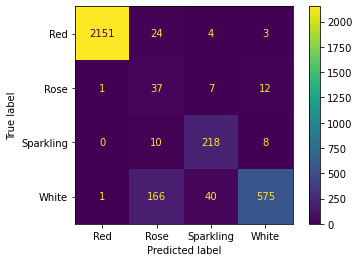

In [270]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [271]:
#on the first try the scored were better but the matrix showed that the model was not able to predict Sparkilg wine. 
#To fix this I added 

In [272]:
#is there a way to fo a correlation matrix before splitting to know if I should drop something?

In [273]:
#hypothesis, averagre sweetness of red is lower than average sweetness of white class_weight = balanced to mitigate the class imbalance. 

Red          8727
White        3191
Sparkling     902
Rose          205
Name: type, dtype: int64


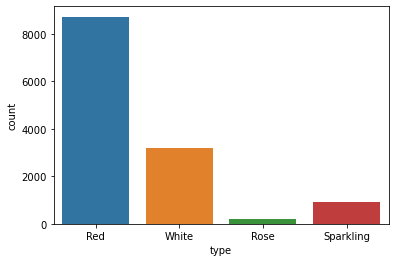

In [274]:
count_classes = df2['type'].value_counts()
print(count_classes)
sns.countplot(x = 'type', data = df2);
plt.show()

In [275]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.46


In [276]:
#the class imbalance is very high

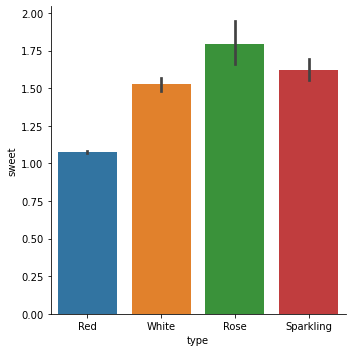

In [277]:
sns.catplot(x="type", y='sweet', kind="bar", data=df2)

In [278]:
#Hypothesis testing: average price of white wine is lower than avergae price of red wine

In [279]:
type_price = df2[['type','price']]
display(type_price)

,type,price
0,Red,165.00
1,Red,82.50
4,Red,0.00
5,Red,0.00
6,Red,0.00
...,...,...
21598,White,15.00
21601,Sparkling,30.00
21602,Rose,30.00
21603,White,30.00


In [280]:
white = type_price.apply(lambda row: row[type_price['type'].isin(['White'])])
display(white)


,type,price
8,White,15.750
11,White,21.000
12,White,13.500
17,White,6.750
43,White,7.425
...,...,...
21566,White,0.000
21567,White,0.000
21597,White,30.000
21598,White,15.000


In [281]:
red = type_price.apply(lambda row: row[type_price['type'].isin(['Red'])])
display(red)

,type,price
0,Red,165.0
1,Red,82.5
4,Red,0.0
5,Red,0.0
6,Red,0.0
...,...,...
21554,Red,0.0
21555,Red,0.0
21563,Red,0.0
21568,Red,0.0


In [282]:
spark = type_price.apply(lambda row: row[type_price['type'].isin(['Sparkling'])])


In [283]:
rose = type_price.apply(lambda row: row[type_price['type'].isin(['Rose'])])


In [284]:
#after filter wine price by type I create a function to perform a two sample t-test

In [285]:
import scipy.stats
import math

In [286]:
def get_statistic(df1,df2):
    mean1 = df1.mean()
    mean2 = df2.mean()
    std1 = np.std(df1, ddof=1)
    std2 = np.std(df2, ddof=1)
    mean_err = mean1 - mean2
    n1 = len(df1)
    n2 = len(df2)
    sp2 = ((n1-1)*(std1**2))+((n2-1)*(std2**2))/((n1+n2)-2)
    sp = math.sqrt(sp2)
    t = mean_err/(sp*(math.sqrt((1/n1)+(1/n2))))
    
    return t

In [287]:
def get_area_t(df1,df2):
    return scipy.stats.t.cdf(get_statistic(df1,df2), df=len(df1)+len(df2)-2)

In [288]:
def get_t(df1, df2):
    t1 = scipy.stats.t.ppf(0.05/2, df=(len(df1) + len(df2) -2) )
    t2 = scipy.stats.t.ppf(1-(0.05/2), df=(len(df1) + len(df2) -2))
    
    return t1, t2

In [289]:
get_statistic(red['price'],white['price'])

0.07379458398314918

In [290]:
get_t(red['price'],white['price'])

(-1.960163087268703, 1.9601630872687026)

In [291]:
get_area_t(red['price'],white['price'])

0.5294124623632918

In [292]:
#hypothesis is true

In [293]:
get_statistic(red['price'],spark['price'])

-0.013966467403415598

In [294]:
get_t(red['price'],spark['price'])

(-1.9602104335318031, 1.9602104335318027)

In [295]:
get_statistic(rose['price'],spark['price'])

-1.7814015607553046

In [296]:
get_t(white['price'],spark['price'])

(-1.960544028859734, 1.9605440288597336)

In [297]:
get_statistic(white['price'],spark['price'])

-0.1467436999752362

In [298]:
#in all of the instances the average price of the type of wine has the same distribution of the others. 